In [1]:
%run preamble.ipynb

In [2]:
import torch

In [6]:
from clickDetector import clickDetector

In [4]:
sys.path.append("ciwfiwgan/")

In [5]:
from infowavegan import WaveGANGenerator, WaveGANQNetwork

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
Number of categories the model was trained on:

In [11]:
nCat = 6

Insert path to the generator here:

In [ ]:
G = WaveGANGenerator(slice_len=2**16)
G.load_state_dict(torch.load("", map_location=device))
G.to(device);

# Data generation

In [9]:
N = 250

In [0]:
ts = np.linspace(-1, 12.5, 10)

In [12]:
c = torch.FloatTensor(N, nCat).to(device)
_z = torch.FloatTensor(N, 100 - nCat).uniform_(-1, 1).to(device)
z = torch.cat((c, _z), dim=1)

In [33]:
res0 = []

for t in ts:
    z[:, 0] = t

    dummy = []

    for i in range(N):
        genData = G(z[i, :])[0, 0, :].detach().cpu().numpy()
        dummy.append(clickDetector(genData)[1])

    res0.append(dummy)

res0 = np.array(res0)

In [34]:
res1 = []

for t in ts:
    z[:, 1] = t

    dummy = []

    for i in range(N):
        genData = G(z[i, :])[0, 0, :].detach().cpu().numpy()
        dummy.append(clickDetector(genData)[1])

    res1.append(dummy)

res1 = np.array(res1)

In [35]:
res2 = []

for t in ts:
    z[:, 2] = t

    dummy = []

    for i in range(N):
        genData = G(z[i, :])[0, 0, :].detach().cpu().numpy()
        dummy.append(clickDetector(genData)[1])

    res2.append(dummy)

res2 = np.array(res2)

In [36]:
res3 = []

for t in ts:
    z[:, 3] = t

    dummy = []

    for i in range(N):
        genData = G(z[i, :])[0, 0, :].detach().cpu().numpy()
        dummy.append(clickDetector(genData)[1])

    res3.append(dummy)

res3 = np.array(res3)

In [37]:
res4 = []

for t in ts:
    z[:, 4] = t

    dummy = []

    for i in range(N):
        genData = G(z[i, :])[0, 0, :].detach().cpu().numpy()
        dummy.append(clickDetector(genData)[1])

    res4.append(dummy)

res4 = np.array(res4)

In [37]:
res5 = []

for t in ts:
    z[:, 5] = t

    dummy = []

    for i in range(N):
        genData = G(z[i, :])[0, 0, :].detach().cpu().numpy()
        dummy.append(clickDetector(genData)[1])

    res5.append(dummy)

res5 = np.array(res5)

# Plot

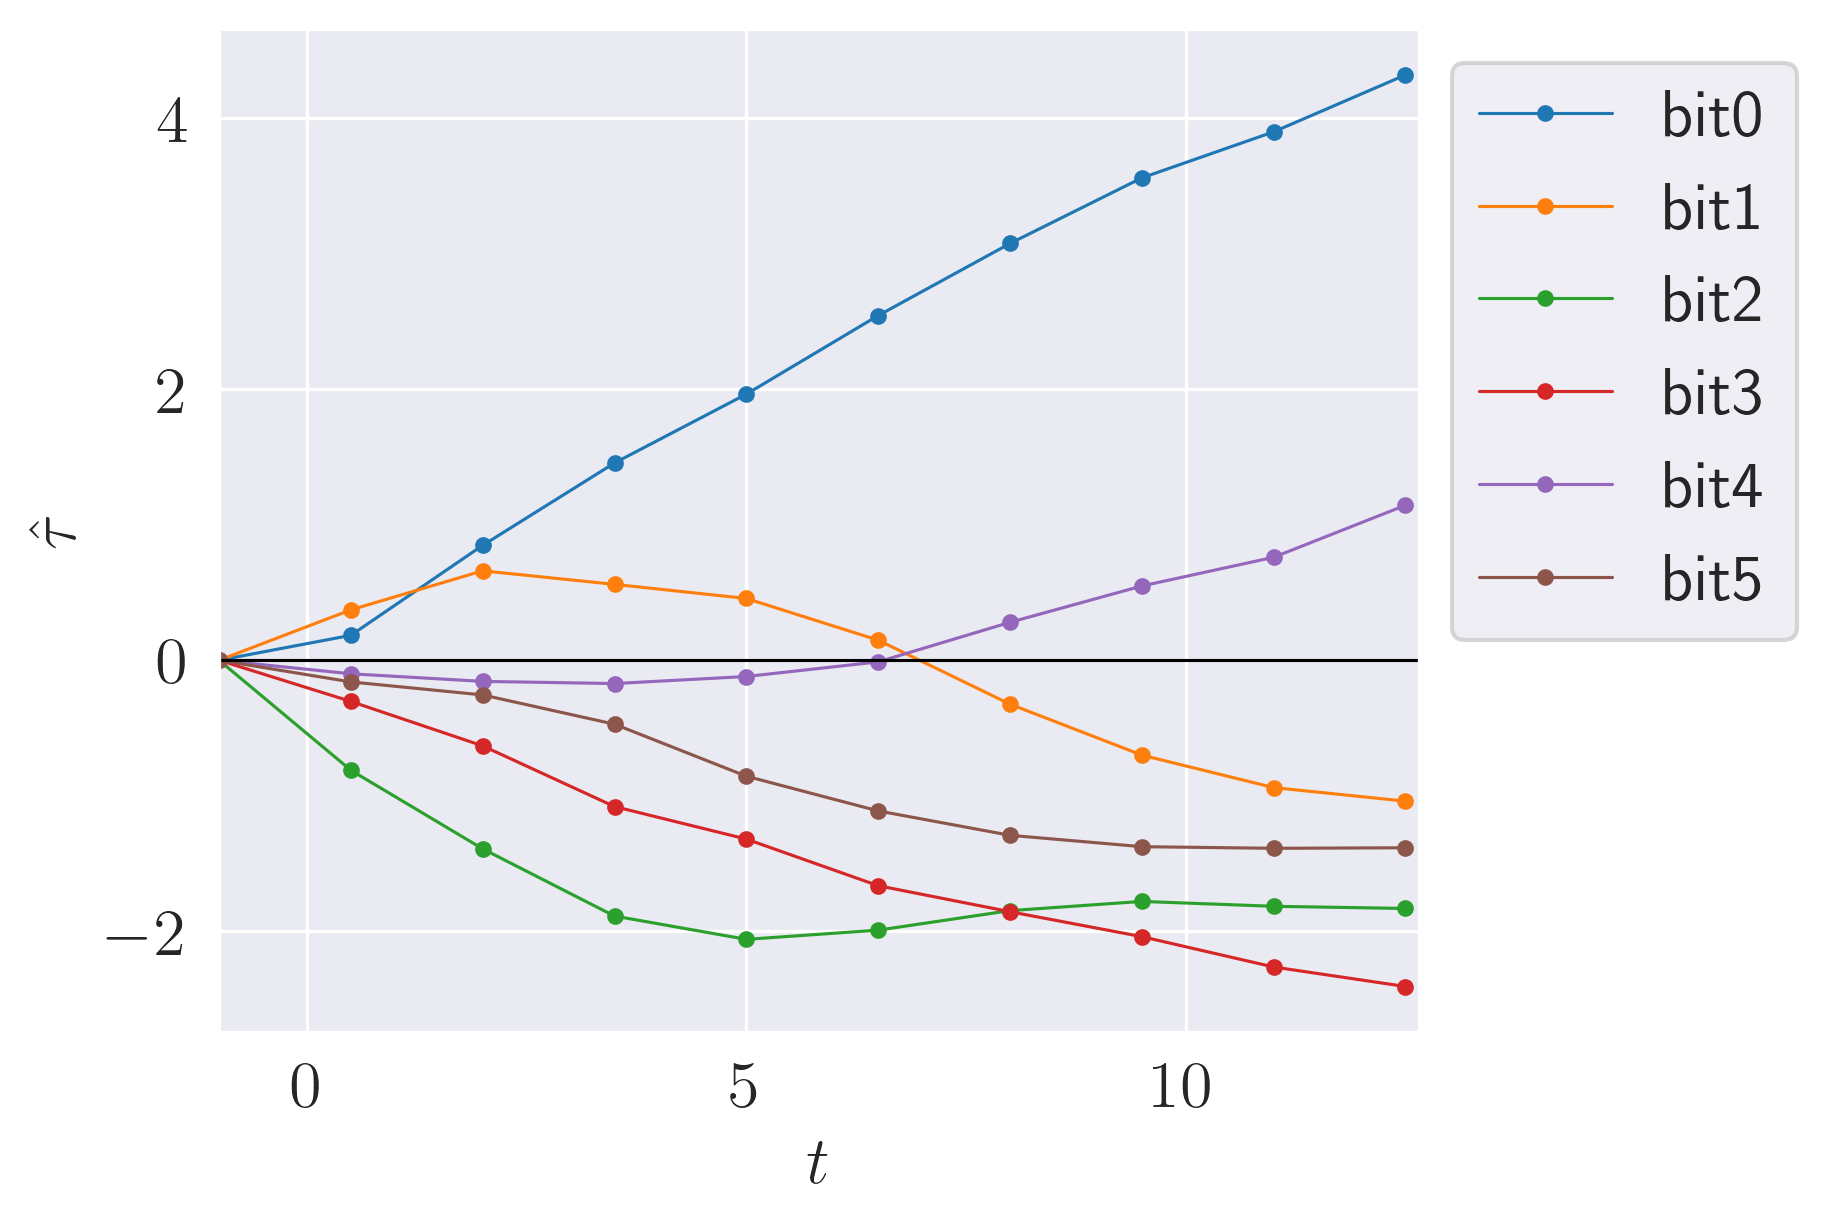

In [14]:
plt.plot(ts, res0.mean(axis=1) - res0.mean(axis=1)[0], label="bit0", marker=".");
plt.plot(ts, res1.mean(axis=1) - res1.mean(axis=1)[0], label="bit1", marker=".");
plt.plot(ts, res2.mean(axis=1) - res2.mean(axis=1)[0], label="bit2", marker=".");
plt.plot(ts, res3.mean(axis=1) - res3.mean(axis=1)[0], label="bit3", marker=".");
plt.plot(ts, res4.mean(axis=1) - res4.mean(axis=1)[0], label="bit4", marker=".");
plt.plot(ts, res5.mean(axis=1) - res5.mean(axis=1)[0], label="bit5", marker=".");


plt.axhline(0, c='k');
plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}$");
plt.legend(loc="best", bbox_to_anchor=(1, 1));
plt.xlim(-1, 12.65);
plt.tight_layout(
    pad=0.25
)